# 4329 Session 4

Homework 3 suggested solutions

# Problem 1

#### a

In [1]:
data = read.csv('https://www.dropbox.com/s/0ya79jktvhvi1h1/data.csv?dl=1')

#### b

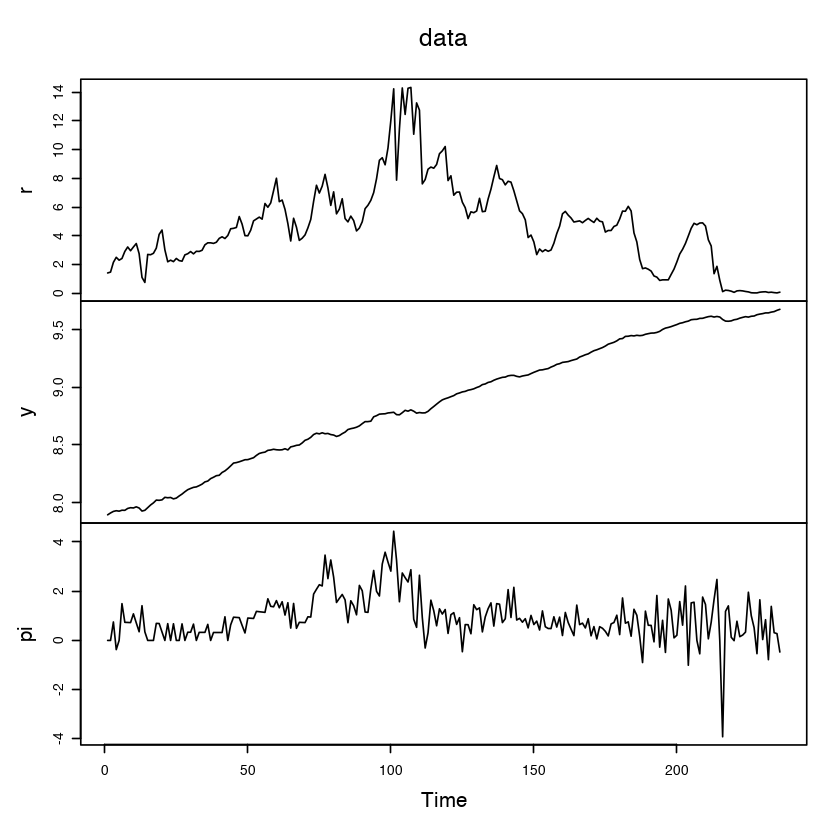

In [2]:
data = as.ts(data)
plot(data)

#### c

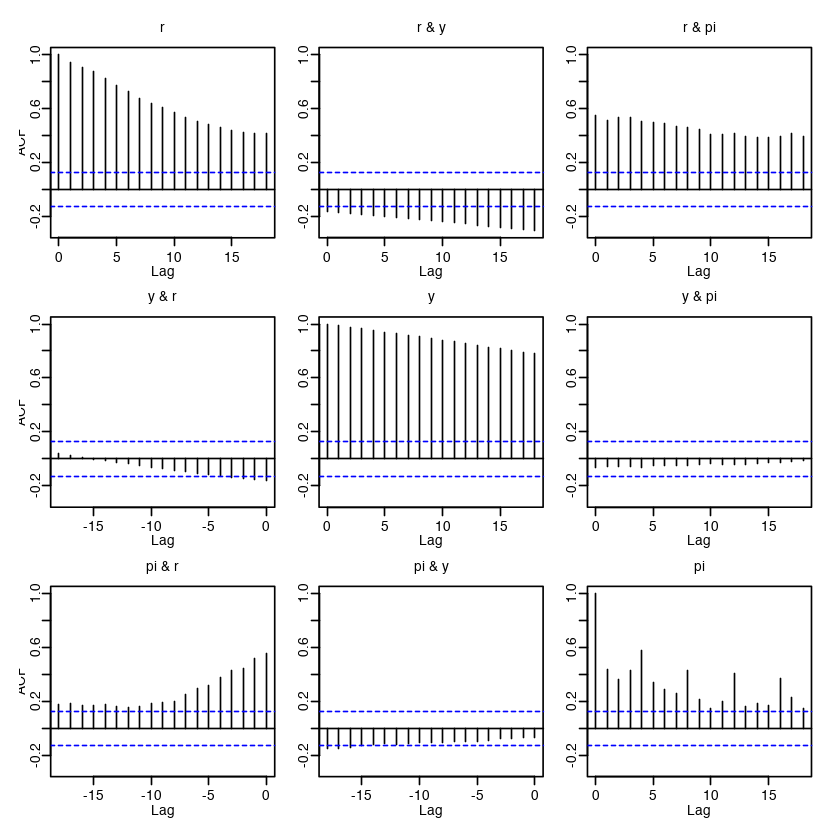

In [3]:
acf(data)

#### d

In [5]:
library(tseries)
adf.test(data[, 'r'])
adf.test(data[, 'y'])
adf.test(data[, 'pi'])


	Augmented Dickey-Fuller Test

data:  data[, "r"]
Dickey-Fuller = -2.5622, Lag order = 6, p-value = 0.3395
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  data[, "y"]
Dickey-Fuller = -1.3474, Lag order = 6, p-value = 0.8502
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  data[, "pi"]
Dickey-Fuller = -3.1444, Lag order = 6, p-value = 0.09794
alternative hypothesis: stationary


#### e

r: rw, y: trend stationary, pi: stationary

#### f

at 10 % level, pi is stationary, others not

#### g

Warning message in adf.test(diff(data)[, "r"]):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  diff(data)[, "r"]
Dickey-Fuller = -6.3425, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(data)[, "y"]):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  diff(data)[, "y"]
Dickey-Fuller = -5.6647, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(data)[, "pi"]):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  diff(data)[, "pi"]
Dickey-Fuller = -7.9521, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


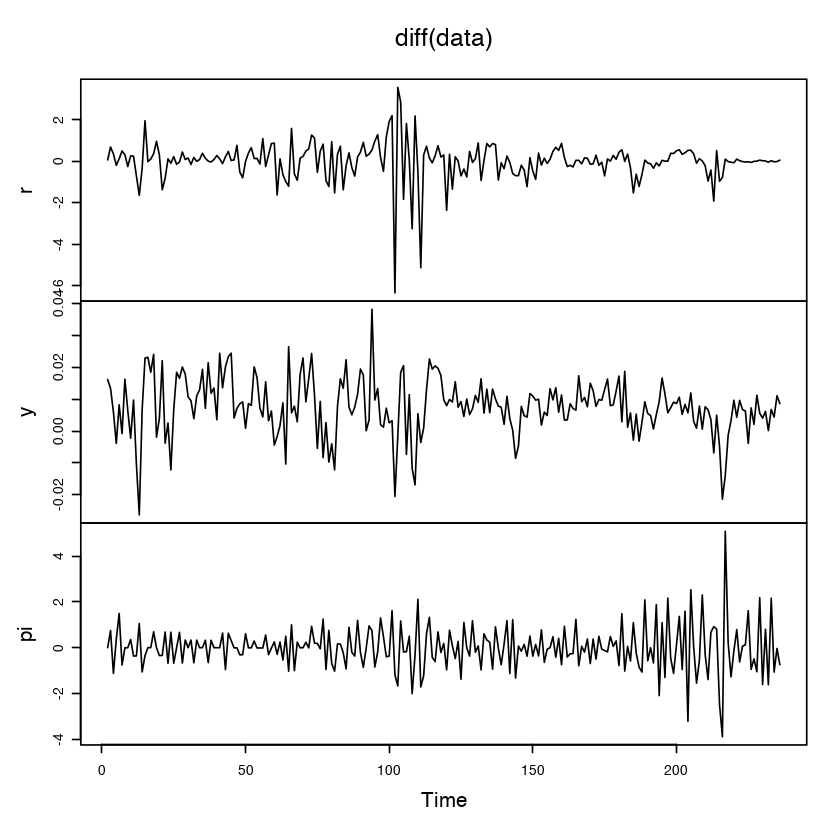

In [8]:
plot(diff(data))
adf.test(diff(data)[, 'r'])
adf.test(diff(data)[, 'y'])
adf.test(diff(data)[, 'pi'])

# yes, seems stationary

#### h

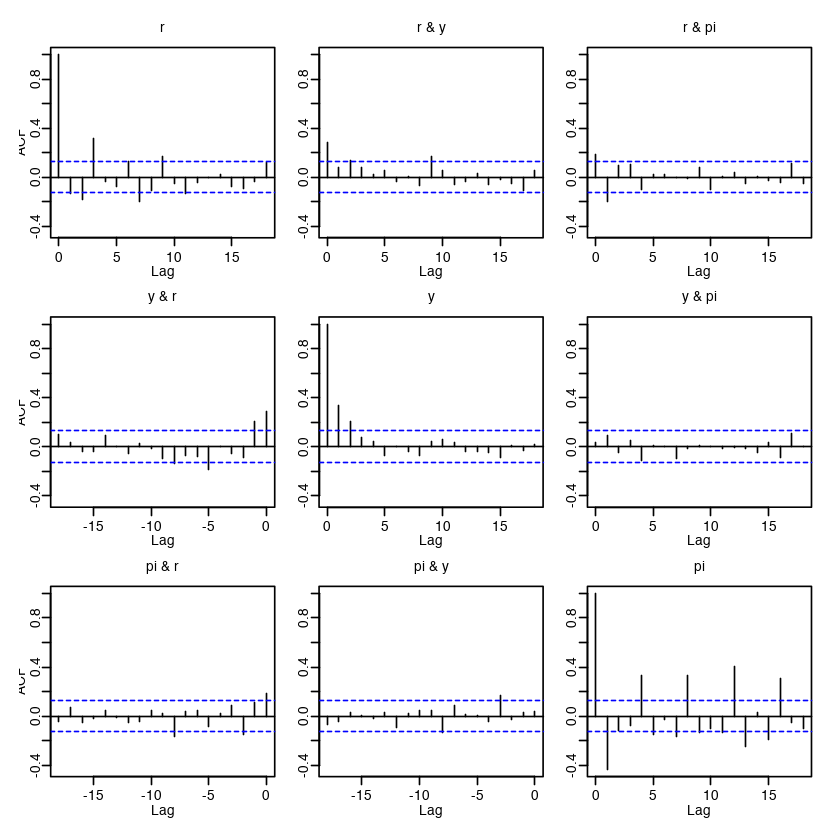

In [9]:
acf(diff(data))

Some small signs

#### i

##### i.

In [12]:
library(forecast)
modelr = auto.arima(data[, 'r'], max.P = 0, max.Q = 0, ic = 'aic')
modelr # ARMA(2, 1, 3)

modely = auto.arima(data[, 'y'], max.P = 0, max.Q = 0, ic = 'aic')
modely # ARMA (2, 1, 0)

Series: data[, "r"] 
ARIMA(2,1,3) 

Coefficients:
         ar1      ar2      ma1     ma2     ma3
      0.1368  -0.2225  -0.2597  0.1041  0.3364
s.e.  0.1655   0.1483   0.1539  0.1483  0.0649

sigma^2 estimated as 0.758:  log likelihood=-298.6
AIC=609.19   AICc=609.56   BIC=629.95

Series: data[, "y"] 
ARIMA(2,1,0) with drift 

Coefficients:
         ar1     ar2   drift
      0.2961  0.1098  0.0076
s.e.  0.0647  0.0647  0.0009

sigma^2 estimated as 6.961e-05:  log likelihood=793.22
AIC=-1578.44   AICc=-1578.26   BIC=-1564.6

##### ii.

In [14]:
auto.arima(data[, 'r'], max.P = 0, max.Q = 0, ic = 'bic')
# ARMA (2, 1, 2)

auto.arima(data[, 'y'], max.P = 0, max.Q = 0, ic = 'bic')
# ARMA (1, 1, 0)

Series: data[, "r"] 
ARIMA(2,1,2) 

Coefficients:
          ar1      ar2     ma1     ma2
      -0.8999  -0.7403  0.8139  0.4912
s.e.   0.1094   0.1079  0.1420  0.1419

sigma^2 estimated as 0.7617:  log likelihood=-299.64
AIC=609.27   AICc=609.53   BIC=626.57

Series: data[, "y"] 
ARIMA(1,1,0) with drift 

Coefficients:
         ar1   drift
      0.3327  0.0076
s.e.  0.0614  0.0008

sigma^2 estimated as 7.017e-05:  log likelihood=791.79
AIC=-1577.58   AICc=-1577.47   BIC=-1567.2

##### iii.

Seems like boarderline white noise from the plot, but rejected by Box-Ljung


	Box-Ljung test

data:  residuals(modelr)
X-squared = 13.079, df = 5, p-value = 0.02265


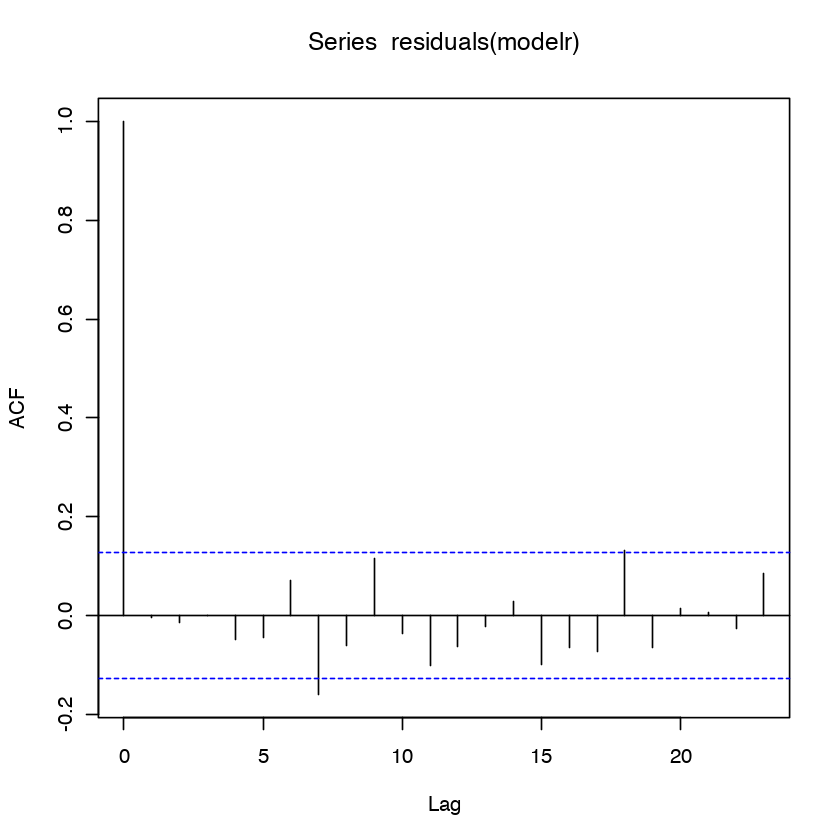

In [16]:
acf(residuals(modelr))
Box.test(residuals(modelr), lag = 10, type = 'Ljung', fitdf = 5)

##### iv.

Yes, some clustering:

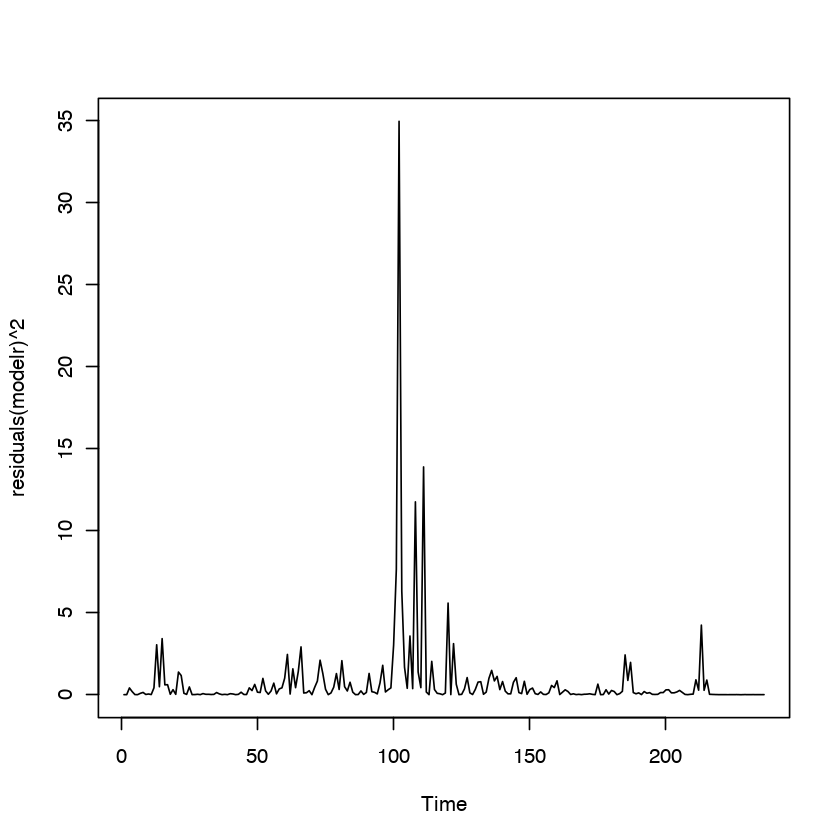

In [19]:
plot(residuals(modelr)^2)

-------------

# Problem 2

#### a

In [20]:
data = read.csv('https://www.dropbox.com/s/0ya79jktvhvi1h1/data.csv?dl=1')
data = as.ts(data)

#### b

In [21]:
var = ar(diff(data), order.max = 4, aic = T)
var


Call:
ar(x = diff(data), aic = T, order.max = 4)

$ar
, , 1

            r       y         pi
r  -0.1455106 16.2063 -0.0981919
y   0.0005167  0.2923  0.0009493
pi  0.1820831  5.0277 -0.8057485

, , 2

           r       y         pi
r  -0.227199 12.7947  0.0329188
y  -0.001982  0.1785  0.0003821
pi  0.001655 -3.0392 -0.6853003

, , 3

           r        y         pi
r   0.227678 -2.76418  0.0302248
y  -0.000772 -0.01625  0.0004155
pi  0.154094 13.22986 -0.5135559


$var.pred
          r         y        pi
r  0.737581 2.087e-03 0.1086986
y  0.002087 6.764e-05 0.0004953
pi 0.108699 4.953e-04 0.4617927


#### c

The autocorrelation and cross-autocorrelations all seem close to zero

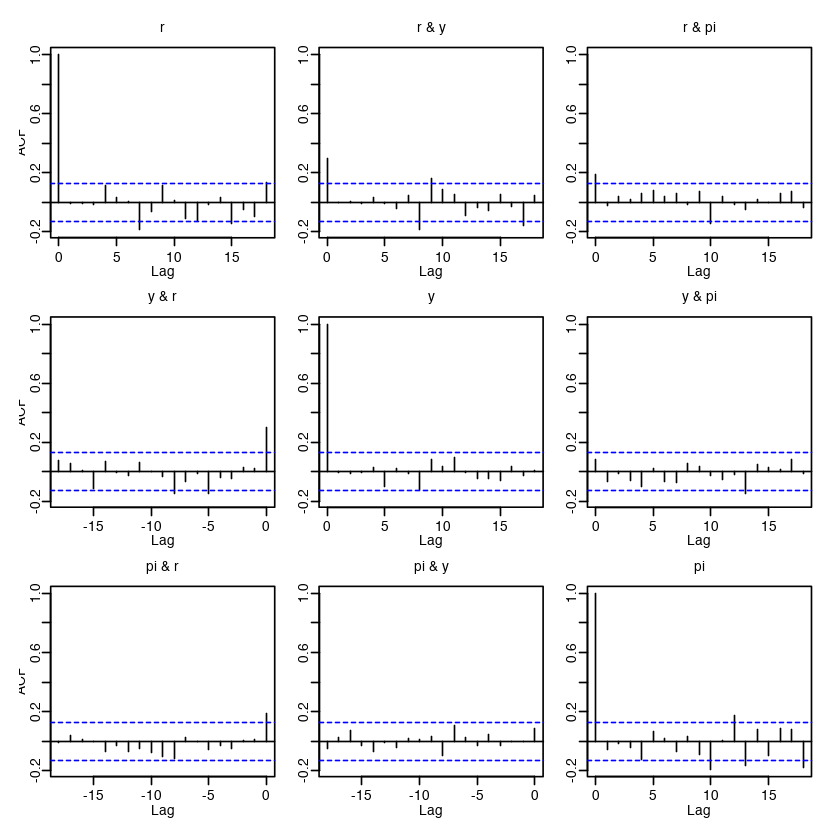

In [3]:
acf(na.omit(var$resid))

#### d

In [5]:
var$ar[1,,]
var$ar[2,,]
var$ar[3,,]

,r,y,pi
r,-0.1455106163,16.2062540,-0.0981918691
y,0.0005166887,0.2923404,0.0009492712
pi,0.1820830737,5.0276604,-0.8057484859


,r,y,pi
r,-0.227198959,12.7946708,0.0329187892
y,-0.001982261,0.1784734,0.0003820715
pi,0.001655260,-3.0392399,-0.6853003223


,r,y,pi
r,0.2276780938,-2.76418265,0.0302248038
y,-0.0007719634,-0.01625131,0.0004155462
pi,0.1540936429,13.22985678,-0.5135558777


#### e

The covariance matrix is (used to compute standard errors of the coefficient estimates)

In [22]:
cov(na.omit(var$resid))

,r,y,pi
r,0.71010948,2.012660e-03,0.1038628823
y,0.00201266,6.479357e-05,0.0004545096
pi,0.10386288,4.545096e-04,0.4342053641


#### f

Based on c): Yes, seems fine

#### g

In [23]:
var1 = ar(diff(data), order.max = 1)

#### h

In [25]:
yn = var1$x.mean * 1.2
yn

#### i

In [26]:
yn_ts = ts(t(data.frame(yn)), start = 237, end = 237)
yn_ts
predict(var1, newdata = yn_ts, n.ahead = 10, se.fit = F)
var1$x.mean

r,y,pi
-0.006842553,0.009089959,-0.002398909


r,y,pi
0.014205539,0.008027236,-0.003488696
-0.002217984,0.007730388,0.002443422
-0.004897215,0.007627778,-0.003521525
-0.004865080,0.007590728,-0.001159794
-0.005750574,0.007581058,-0.002236357
-0.005576364,0.007576599,-0.001902654
-0.005713930,0.007575644,-0.002019992
-0.005688212,0.007575144,-0.001992307
-0.005702808,0.007575038,-0.001999560
-0.005701022,0.007574986,-0.001999079


r            y           pi 
-0.005702128  0.007574966 -0.001999091

They converge (as they should in a stationary model)

#### j

In [27]:
phi_hat = var1$ar[1, , ]
phi_hat

,r,y,pi
r,-0.132891458,12.9957312,-0.1692522981
y,0.001047693,0.2994738,0.0005891462
pi,0.209316080,-0.9506641,-0.4735984075


Interpretation example: the change in last period's inflation has a negative effect on the current period change in t bill rate (-0.16, can't say if it is significant since we did not compute standard errors)

#### k

The absolute value of all the eigenvalues are less than one, so it is stationary

In [28]:
abs(eigen(phi_hat)$values)
# All less than one

[1] 0.3375410 0.3375410 0.3300387

----------------------------

# Problem 3

#### a

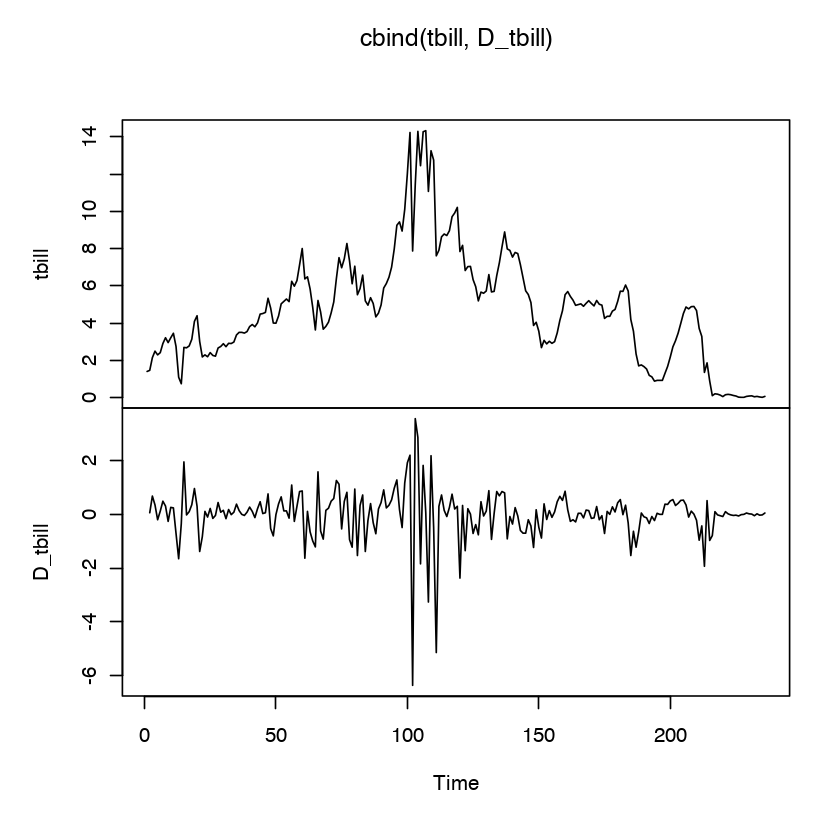

In [29]:
tbill = data[, 'r']
D_tbill = diff(tbill)
plot(cbind(tbill, D_tbill))

#### b

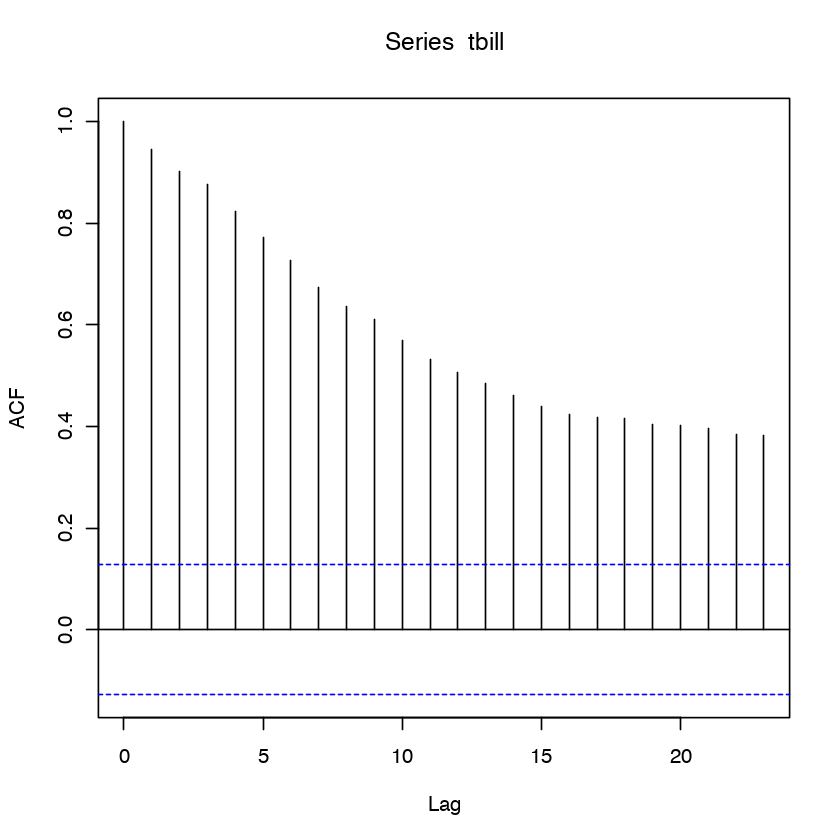

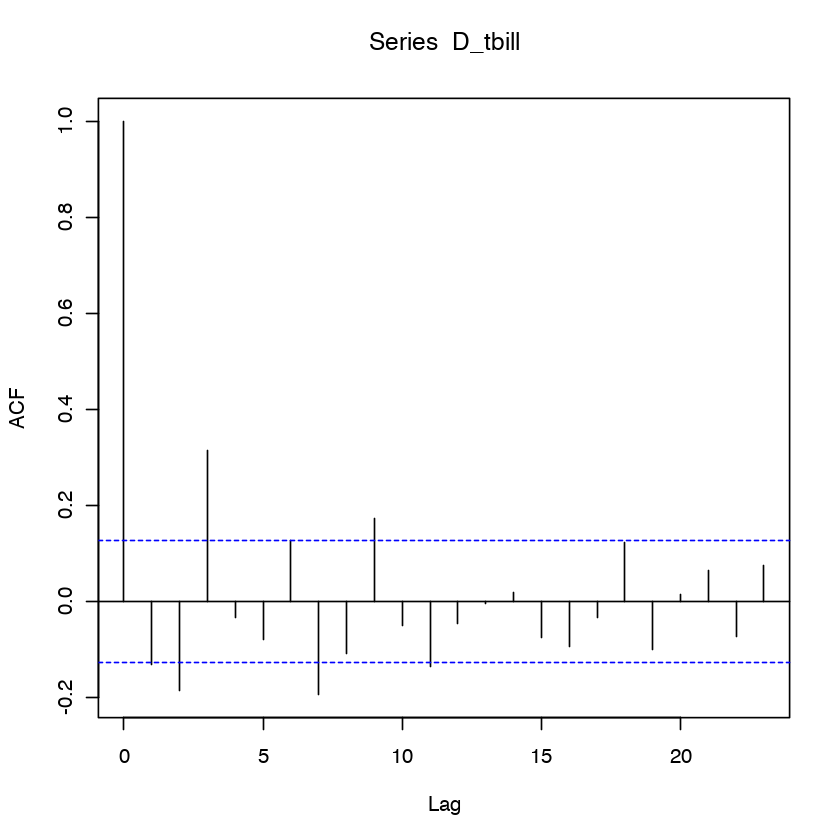

In [30]:
acf(tbill)
acf(D_tbill)

#### c

The difference is stationary

In [32]:
adf.test(tbill)
adf.test(D_tbill)


	Augmented Dickey-Fuller Test

data:  tbill
Dickey-Fuller = -2.5622, Lag order = 6, p-value = 0.3395
alternative hypothesis: stationary


Warning message in adf.test(D_tbill):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  D_tbill
Dickey-Fuller = -6.3425, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


#### d

Auto.arima gives ARIMA(2,1,3)

searching up to GARCH(2, 2) gives GARCH(1,1)

In [35]:
library(forecast)
library(rugarch)

auto.arima(tbill, ic = 'aic')
# ARIMA(2,1,3)

pq = expand.grid(p=1:2, q=1:2)
AICs = matrix(0, nrow = nrow(pq), ncol = 3)
colnames(AICs) = c('AIC', 'p', 'q')
for (row in 1:nrow(pq)) {
    p = pq[row, 1]
    q = pq[row, 2]
    spec = ugarchspec(
    mean.model = list(armaOrder = c(2, 3)),
    variance.model = list(garchOrder = c(p, q))
    )
    
    model = ugarchfit(spec, D_tbill)
    AICs[row, ] = c(infocriteria(model)[1], p, q)
}   
AICs
# Minimum: GARCH(1,1)

Series: tbill 
ARIMA(2,1,3) 

Coefficients:
         ar1      ar2      ma1     ma2     ma3
      0.1368  -0.2225  -0.2597  0.1041  0.3364
s.e.  0.1655   0.1483   0.1539  0.1483  0.0649

sigma^2 estimated as 0.758:  log likelihood=-298.6
AIC=609.19   AICc=609.56   BIC=629.95

AIC,p,q
1.940916,1,1
1.949427,2,1
1.945861,1,2
1.954371,2,2


#### e

In [37]:
spec = ugarchspec(
mean.model = list(armaOrder = c(2, 3)),
variance.model = list(garchOrder = c(1, 1))
)

model = ugarchfit(spec, D_tbill)
model

ARMA(2, 3) + GARCH(1, 1) on differenced t bill


$\Delta r_t = mu +  ar1\Delta r_{t-1} + ar2 \Delta r_{t-2}  
+ ma1 u_{t-1} + ma2 u_{t-2} + ma3 u_{t-3} + u_t$

$u_t = \epsilon_t \sigma_t$

$\sigma_t^2 = omega + alpha1 u^2_{t-1} + beta1 \sigma^2_{t-1}$

#### f

In [38]:
coef(model)

mu        ar1        ar2        ma1        ma2        ma3      omega 
 0.0194810  1.0669407 -0.8098846 -0.9307754  0.6596506  0.2059380  0.0145972 
    alpha1      beta1 
 0.3869732  0.6120268

#### g

Seem to be free from serial correlation (see Ljung Box test output above (`summary(model))` for the standardized residuals)

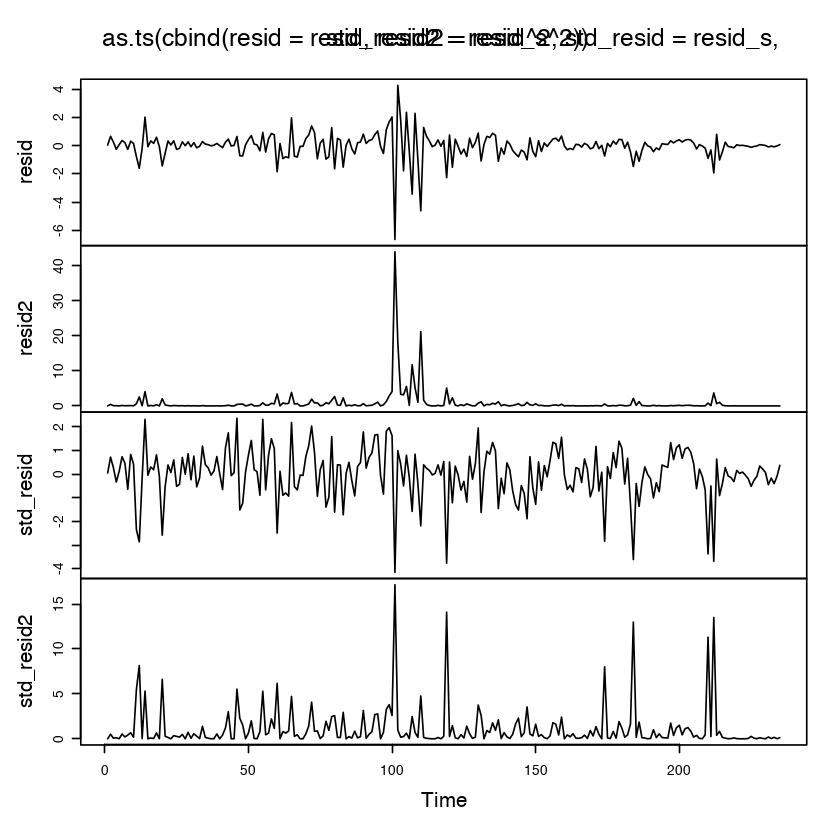

In [39]:
resid = residuals(model, standardize = FALSE)
resid_s = residuals(model, standardize = TRUE)
plot(as.ts(cbind(resid=resid, resid2 = resid^2,
                 std_resid=resid_s, std_resid2 = resid_s^2)))

#### h

Auto.arima gives gives ARMA(2, 3)

Search up to GARCH(2,2) gives GARCH(2, 1)

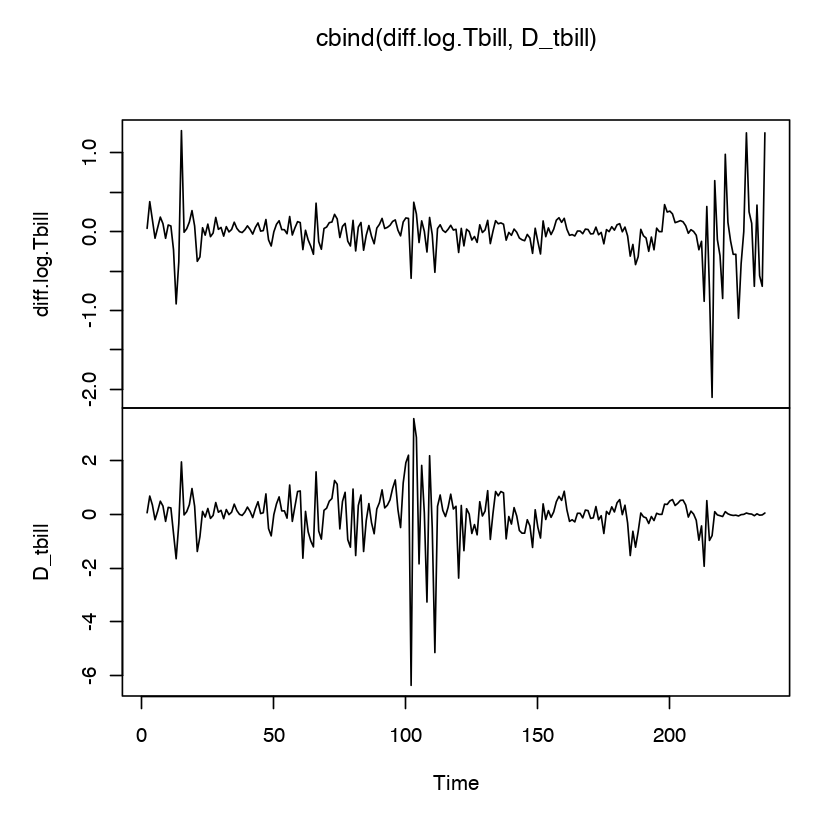

In [41]:
diff.log.Tbill = diff(log(tbill))

plot(cbind(diff.log.Tbill, D_tbill))

spec = ugarchspec(
mean.model = list(armaOrder = c(2, 3)),
variance.model = list(garchOrder = c(p, q))
)
    
modelh = ugarchfit(spec, diff.log.Tbill)

------------------------

# Problem 4

#### a

In [42]:
arrests = read.csv('https://www.dropbox.com/s/cnvkf5p8avpbvso/arrests.csv?dl=1')

colMeans(arrests)

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

#### b

In [43]:
apply(arrests, 2, sd)

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

#### c

No, they are clearly in different units

#### d

In [44]:
pca = prcomp(arrests, scale. = TRUE)

#### e

In [45]:
pca$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


#### f

#### g

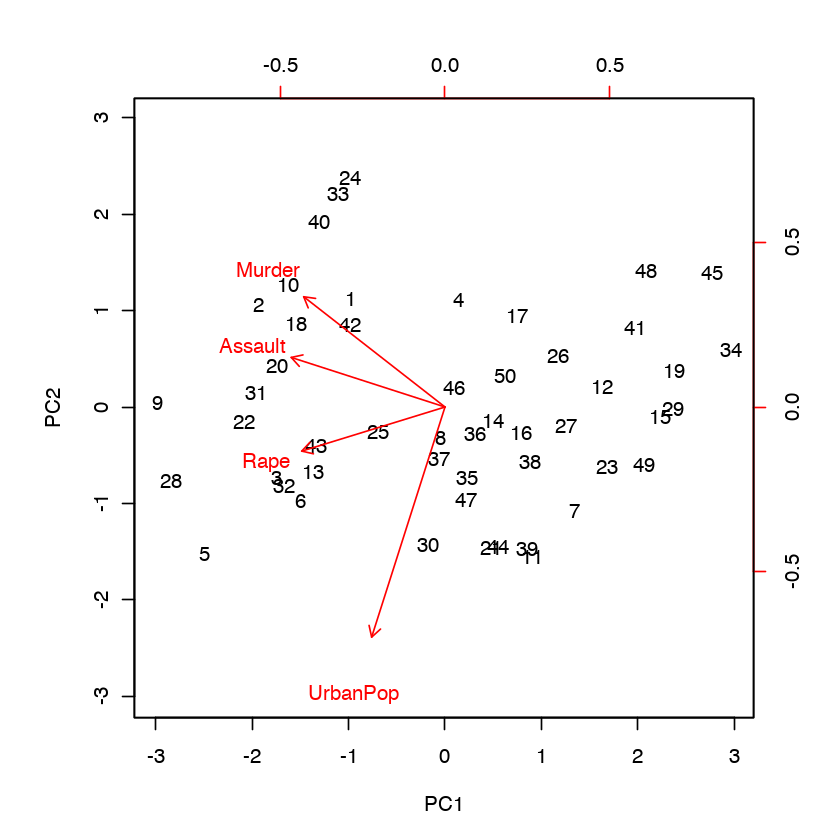

In [46]:
biplot(pca, scale = 0)

#### h

In [48]:
summary(pca)

Importance of components%s:
                          PC1    PC2     PC3     PC4
Standard deviation     1.5749 0.9949 0.59713 0.41645
Proportion of Variance 0.6201 0.2474 0.08914 0.04336
Cumulative Proportion  0.6201 0.8675 0.95664 1.00000

Same as:

In [49]:
pca$sdev^2 / sum(pca$sdev^2)

[1] 0.62006039 0.24744129 0.08914080 0.04335752

-------------- 

# Problem 5

#### a

In [51]:
library(glmnet)
hitters = read.csv('https://www.dropbox.com/s/wegdiltivjpavgl/hitters.csv?dl=1')

#### b

In [52]:
hitters = hitters[complete.cases(hitters), ]
X = model.matrix(Salary ~ ., hitters)[, -1]
y = hitters$Salary

#### c

Ridge with standardized variables and 100 $\lambda$s

In [53]:
ridge = glmnet(X, y, alpha = 0)

#### d

In [54]:
ridge2 = glmnet(X, y, alpha = 0, lambda = 100)

#### e

In [55]:
ridge3 = glmnet(X, y, alpha = 0,  lambda = 100, standardize = FALSE)

#### f

In [56]:
coef(ridge2)

20 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)   21.27786308
AtBat         -0.11528706
Hits           1.38635620
HmRun         -0.71635449
Runs           1.16689896
RBI            0.84877271
Walks          2.19163452
Years         -2.87521081
CAtBat         0.00966355
CHits          0.08298163
CHmRun         0.54335987
CRuns          0.16438393
CRBI           0.17346125
CWalks        -0.04313755
LeagueN       36.77139957
DivisionW   -108.67424452
PutOuts        0.22754702
Assists        0.07699987
Errors        -2.62990736
NewLeagueN    -0.02137356

#### g

Smaller when a large $\lambda$ is used

#### h

In [57]:
# uneven:
train_index = sample(1:nrow(X), 200) # use a training set of 200 observations
X_train = X[train_index, ]
y_train = y[train_index]
X_test = X[-train_index, ]
y_test = y[-train_index]

# even (approx 50/50 for train/test)
train = sample(c(TRUE, FALSE), nrow(X), replace = TRUE)
X_train = X[train, ]
y_train = y[train]
X_test = X[!train, ]
y_test = y[!train]

#### i

In [58]:
ridge_train = glmnet(X_train, y_train, alpha = 0, lambda = 4)
mean((predict(ridge_train, newx = X_test) - y_test)^2)

[1] 143325.8

#### j

In [61]:
ridge_train2 = glmnet(X_train, y_train, alpha = 0, lambda = 10^10)
mean((predict(ridge_train2, newx = X_test) - y_test)^2)

[1] 258001.7

Which is the same as a constant since all coefficients are zero (intercept is never penalized)

In [62]:
mean((mean(y_train) - y_test)^2)

[1] 258001.8

#### k

In [63]:
ols = glmnet(X_train, y_train, alpha = 0, lambda = 0)
mean((predict(ols, newx = X_test) - y_test)^2)

[1] 141623.3

Benefit: smaller test set MSE with Ridge

#### l

In [69]:
lasso = glmnet(X, y, alpha = 1)

#### m

In [67]:
s = lasso$lambda[c(length(lasso$lambda), length(lasso$lambda)/2, 1)]

coef(lasso, s = s)

20 x 3 sparse Matrix of class "dgCMatrix"
                        1             2        3
(Intercept)  1.624692e+02   28.68738554 535.9259
AtBat       -2.007903e+00   -0.42962953   .     
Hits         7.456510e+00    3.18852344   .     
HmRun        3.424967e+00    .            .     
Runs        -2.131392e+00    .            .     
RBI         -7.118809e-01    .            .     
Walks        6.148075e+00    2.69225025   .     
Years       -4.811645e+00   -3.14865575   .     
CAtBat      -1.377944e-01    .            .     
CHits        8.014685e-02    .            .     
CHmRun      -5.259073e-04    0.09537765   .     
CRuns        1.390657e+00    0.28831232   .     
CRBI         7.192996e-01    0.42158485   .     
CWalks      -8.088093e-01   -0.06588691   .     
LeagueN      5.952915e+01   25.26886198   .     
DivisionW   -1.167267e+02 -118.15837911   .     
PutOuts      2.832109e-01    0.24478395   .     
Assists      3.529654e-01    .            .     
Errors      -3.253731e+00  